# Importar libreria requeridas

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# NLTK 
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#nltk.download()
nltk.download('omw-1.4')
nltk.download('stopwords')

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string proccessing
import re
import string


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df = pd.read_csv('../EDA/comentarios_sin_emojis.csv')
df.head()

,Text,IsToxic
0,people step case nt people situation lump m...,False
1,Law enforcement trained shoot apprehend trai...,True
2,nt reckon black lives matter banners held whit...,True
3,large number people like police officers calle...,False
4,Arab dude absolutely right shot extra time S...,False


# Normalización y limpieza

<h5>Se realiza la limpieza y normalización de los comentarios de la columna Text en las siguientes fases:</h5>
<ol>
    <li><b>Eliminación de las stopwords:</b> con la clase stopwords de la libreria nltk: Las palabras vacías o stopwords son palabras en cualquier idioma o corpus que ocurren con frecuencia. Nno aportan ninguna información adicional o valiosa al texto que las contiene. Palabras como a, they, the, is, an, etc. generalmente se consideran palabras vacías.</li>
    <li><b>Eliminación de carácteres pocos significativos:</b> Con metodo sub de la clase re(proporciona operaciones de coincidencia de expresiones regulares).El método sub retorna la cadena obtenida reemplazando las ocurrencias no superpuestas del pattern («patrón») pasado en el primer parametro en la string (tercer parametro) por el reemplazo indicado en el segundo parametro.</li>
      <li><b>Lematización:</b> Con metodo lemmatize de la clase WordLemmatizer de la libreria nltk.La lematización es un proceso lingüístico que consiste en, dada una forma flexionada, hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos.</li>
     <li><b>Tokenización:</b> Con metodo wordtokenizer de la libreria nltk.La tokenización consiste en dividir un texto en entidades más pequeñas llamadas tokens.</li>
         <li><b>Normalización:</b> estandarización de las palabras de los comentarios.En este caso se convierten todas las palabras a minúsculas</li>
    
</ol>

### Stopwords

In [50]:
english_stopwords = stopwords.words('english')
english_stopwords.append('nt')
# Resta de conjuntos : stopwords sin los elementos del segungo conjunto set
stopwords = set(english_stopwords) - set(['i', 'he', 'she', 'you', 'me', 'we', 'us',
                                                   'this', 'them', 'that', 'those', 'her', 'his'])

### Lematizacion

In [51]:
wnl = WordNetLemmatizer()

#### Metodo lemmatize() de la clase WordNetLemmatizer de la librería NLTK

Recibe 2 parametros: texto a lemmatizar y pos.
El parámetro pos es la etiqueta de la parte del discurso a lematizar.
Las opciones válidas son `"n"` para sustantivos, `"v"` para verbos, `"a"` para adjetivos, `"r"` para adverbios y `"s"` para adjetivos satélite.

In [52]:
def lematiza_nombres(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token)
        a.append(lemmetized_word)
    return a

def lematiza_verbos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='v')
        a.append(lemmetized_word)
    return a

def lematiza_adjetivos(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='a')
        a.append(lemmetized_word)
    return a

def lematiza_adverbios(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token, pos='r')
        a.append(lemmetized_word)
    return a

def lematiza_adj_satelites(words):
    a = []
    for token in words:
        lemmetized_word = wnl.lemmatize(token,pos='s')
        a.append(lemmetized_word)
    return a

### Normalización --> Eliminación de caracteres poco significativos y convertir a minúsculas los comentarios

In [53]:
def eliminar_caracteres(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', text)
    text = re.sub(r'https|http?:\/\/\S+', '', text)
    return text


In [55]:
def minusculas(text):
    text = text.lower()
    return text

In [54]:
# Convierte lista de strings en una cadena de strings
def list_to_strs(text):
    return ' '.join(text)


In [56]:
# Normalizacion y limpieza 
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Text'] = df['Text'].apply(eliminar_caracteres)
df['Text'] = df['Text'].apply(minusculas)
# Tokenización y lematización
df['Text'] = df['Text'].apply(word_tokenize)
df['Text'] = df['Text'].apply(lematiza_nombres)
df['Text'] = df['Text'].apply(lematiza_verbos)
df['Text'] = df['Text'].apply(lematiza_adjetivos)
df['Text'] = df['Text'].apply(lematiza_adverbios)
df['Text'] = df['Text'].apply(lematiza_adj_satelites)
df['Text'] = df['Text'].apply(list_to_strs)

In [57]:
df['Text']

0      people step case people situation lump mess ma...
1      law enforcement train shoot apprehend train sh...
2      reckon black life matter banner hold white cun...
3      large number people like police officer call c...
4      arab dude absolutely right shoot extra time sh...
                             ...                        
994                       remember send national defence
995    stats represent problem race bait attitude cri...
996                   quote mother wow hit hard accurate
997                                         video racist
998                              god narrator annoy lisp
Name: Text, Length: 999, dtype: object


##  Vectorización de palabras

In [58]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

### Mezcla aleatoria de los registros del dataframe

In [59]:
## Hipotesis: mezclamos el df por sesgos humanos a la hora de insertar registros o comentarios que son
## sugestionados por el sig o ant comentario
df = shuffle(df, random_state = 42)
df

,Text,IsToxic
453,good job determine occur brown kill occur simp...,False
793,awesome job peggy thank tell truth westandwith...,False
209,come read racist comment lol,False
309,major difference zimmerman case shooter zimmer...,False
740,nigga love victim situation separate black peo...,True
...,...,...
106,think indecent unessacerry event person shoot ...,False
270,guy love guy spend minute telus roll blunt,False
860,people shouldve wish wouldve literally burn en...,True
435,look like m brown suicide cop thing,True


### Vectorizacion: ajuste y escalado/normalizacion de los tokens

In [60]:
# Inicializacion de constructores de las 2 técnicas de vectorizacion: CountVectorizer() y TfidfTransformer()
vectorizer = CountVectorizer()
tfid = TfidfTransformer()

In [61]:
#Ajuste y escalado (normalizacion). Finalmente Pasamos a array nuestro vectores a nuestro modelo
X = vectorizer.fit_transform(df['Text']).toarray()
X = tfid.fit_transform(X).toarray()

In [62]:

df['IsToxic'] = df['IsToxic'].replace({True: 1, False: 0})

print(df['IsToxic'])

453    0
793    0
209    0
309    0
740    1
      ..
106    0
270    0
860    1
435    1
102    1
Name: IsToxic, Length: 999, dtype: int64


In [63]:
y = df['IsToxic']

# Entrenar modelo

### Separación de datos de entrenamiento y validación

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Entrenamiento con Catboost

In [76]:
CBT_model = CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC', use_best_model=True ) # use_best_model params will make the model prevent overfitting)

In [77]:
CBT_model.fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)


In [78]:

y_pred_CBT = CBT_model.predict(X_test)


### Métricas

In [79]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def show_metrics(predicciones_test, resultado_test,predicciones_train,resultado_train):
    # Metricas de test
   # Score_auc = roc_auc_score(y_true = predicciones_test, y_score = resultado_test)
    f1 = f1_score(y_true = predicciones_test, y_pred = resultado_test)
    precision=precision_score(y_true = predicciones_test, y_pred = resultado_test)
    accuracy= accuracy_score(y_true = predicciones_test, y_pred = resultado_test)
    #print(f'Score_auc:{Score_auc}')
    print(f'f1_score:{f1}')
    print(f'precision:{precision}')
    print(f'accuracy:{accuracy}')
    print()
    # Metricas train
    print("METRICAS TRAIN")
    #Score_auc_train = roc_auc_score(y_true = predicciones_train, y_score = resultado_train)
    f1_train = f1_score(y_true = predicciones_train, y_pred = resultado_train)
    precision_train=precision_score(y_true = predicciones_train, y_pred = resultado_train)
    accuracy_train= accuracy_score(y_true = predicciones_train, y_pred = resultado_train)
    #print(f'Score_auc train:{Score_auc_train}')
    print(f'f1_score train:{f1_train}')
    print(f'precision train:{precision_train}')
    print(f'accuracy train:{accuracy_train}')
    
    # Overfitting
    print()
    print("Overfitting")
    #print(f'Score_auc overfitting: {((Score_auc_train-Score_auc)*100)/Score_auc} %')
    print(f'f1_score overfitting:{((f1_train-f1)*100)/f1} %')
    print(f'precision overfitting:{((precision_train-precision)*100)/precision} %')
    print(f'accuracy overfitting:{((accuracy_train-accuracy)*100)/accuracy} %')
    
    ## MAtriz de confusión
    print(classification_report(predicciones_test,resultado_test))
    matriz_confusion = confusion_matrix(y_true = predicciones_test, y_pred = resultado_test)
    matriz_confusion_df = pd.DataFrame(matriz_confusion)
    label = ['positivo', 'negativo']
       
    matriz_confusion_df.columns= label
    matriz_confusion_df.index = label

    # Y nombramos lo que son las columnas y las filas:
    matriz_confusion_df.columns.name = "Predicho"
    matriz_confusion_df.index.name = "Real"

    plt.figure(figsize=(8,4))
    sns.heatmap(matriz_confusion_df,                     
            annot=True,
            fmt="d",
            cmap="Blues")

f1_score:0.4651162790697674
precision:0.3125
accuracy:0.655

METRICAS TRAIN
f1_score train:0.4513457556935818
precision train:0.2978142076502732
accuracy train:0.6683354192740926

Overfitting
f1_score overfitting:-2.960662525879896 %
precision overfitting:-4.699453551912569 %
accuracy overfitting:2.0359418739072583 %
              precision    recall  f1-score   support

           0       0.97      0.60      0.75       167
           1       0.31      0.91      0.47        33

    accuracy                           0.66       200
   macro avg       0.64      0.76      0.61       200
weighted avg       0.86      0.66      0.70       200



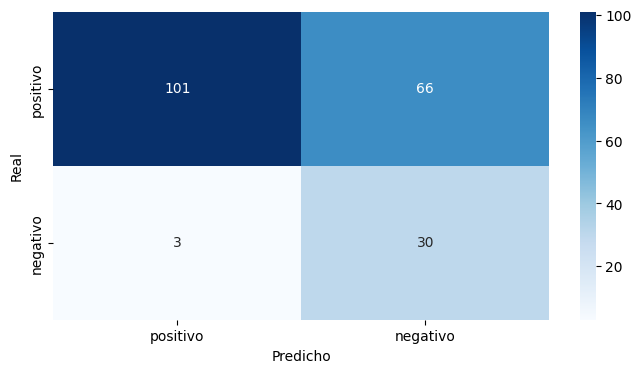

In [80]:

pred_train = CBT_model.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)

show_metrics(y_pred_CBT, y_test,y_pred_train,y_train)

### Optimización de hiperparámetros con RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

estimator =CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC', use_best_model=True )

parameters = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

rd_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=False
)

eval_set = [(X_train, y_train), (X_test, y_test)]
rd_search.fit(X_train, y_train,
                early_stopping_rounds = 20,
                eval_set = eval_set, verbose = False)

print(" The best estimator across ALL searched params: ", rd_search.best_estimator_)
print(" The best score across ALL searched params: ", rd_search.best_score_)
print(" The best parameters across ALL searched params: ", rd_search.best_params_)
print(" The best scoring across ALL searched params: : ", rd_search.scoring)

# Guardamos el mejor modelo
modelo_CB_hyper = rd_search.best_estimator_



 The best estimator across ALL searched params:  <catboost.core.CatBoostClassifier object at 0x0000025FCE16DA20>
 The best score across ALL searched params:  0.7636737450394336
 The best parameters across ALL searched params:  {'learning_rate': 0.03, 'l2_leaf_reg': 5, 'depth': 10}
 The best scoring across ALL searched params: :  roc_auc


f1_score:0.611111111111111
precision:0.4583333333333333
accuracy:0.72

METRICAS TRAIN
f1_score train:0.5962962962962963
precision train:0.43989071038251365
accuracy train:0.7271589486858573

Overfitting
f1_score overfitting:-2.4242424242424097 %
precision overfitting:-4.0238450074515635 %
accuracy overfitting:0.9942984285912936 %
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       152
           1       0.46      0.92      0.61        48

    accuracy                           0.72       200
   macro avg       0.71      0.79      0.70       200
weighted avg       0.84      0.72      0.74       200



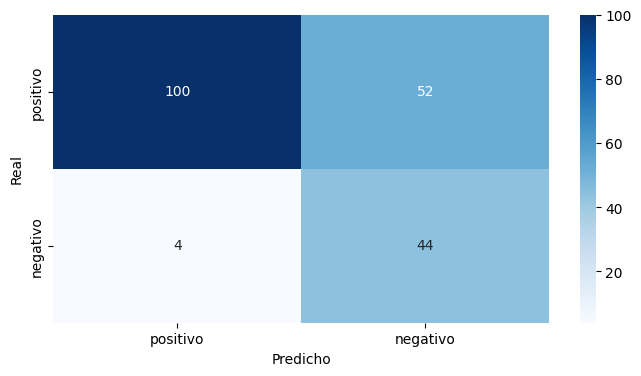

In [84]:
y_pred_CB_rs = modelo_CB_hyper.predict(X_test)
pred_train = modelo_CB_hyper.predict(X_train)
y_pred_train_rs = pred_train.astype(dtype=bool)
show_metrics(y_pred_CB_rs, y_test,y_pred_train_rs,y_train)

### Optimización de hiperparámetros con GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV
CBC = CatBoostClassifier()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1,scoring = 'precision')
Grid_CBC.fit(X_train, y_train,
                early_stopping_rounds = 20,
                eval_set = eval_set, verbose = False)

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025FCE16D8A0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             scoring='precision')

In [89]:
modelo_CB_hyperGrid = Grid_CBC.best_estimator_

f1_score:0.5714285714285715
precision:0.4166666666666667
accuracy:0.7

METRICAS TRAIN
f1_score train:0.5544933078393881
precision train:0.39617486338797814
accuracy train:0.7083854818523154

Overfitting
f1_score overfitting:-2.963671128107095 %
precision overfitting:-4.9180327868852505 %
accuracy overfitting:1.1979259789022099 %
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       156
           1       0.42      0.91      0.57        44

    accuracy                           0.70       200
   macro avg       0.69      0.78      0.67       200
weighted avg       0.84      0.70      0.73       200



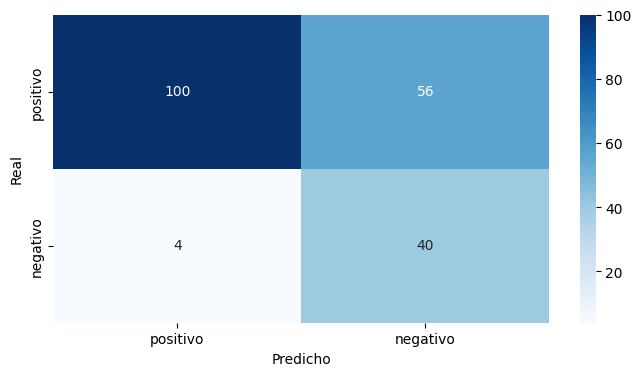

In [90]:
y_pred_CBGS =modelo_CB_hyperGrid.predict(X_test)
pred_train =modelo_CB_hyperGrid.predict(X_train)
y_pred_trainGS = pred_train.astype(dtype=bool)
show_metrics(y_pred_CBGS, y_test,y_pred_trainGS,y_train)

# Guardar transformer y mejor modelo

In [86]:
import pickle

In [92]:
### Guardando diccionario BoW para usarlo mas tarde en la predicción
transformer_path = 'transformer_final.pkl'
pickle.dump(X , open(transformer_path, "wb"))

In [91]:
pickle.dump(modelo_CB_hyperGrid, open('modelo_entrenado_final.pkl', 'wb'))